# 图像处理实验

这个笔记本用于实验和调试图像处理算法。

In [2]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 添加项目根目录到路径
sys.path.append('..')

from src.utils.image_io import read_image, save_image
from src.utils.color_space import adjust_brightness, adjust_contrast, adjust_saturation
from src.utils.filters import gaussian_blur, bilateral_filter, unsharp_mask, edge_detection
import src.config as config

# # 设置matplotlib显示中文
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## 1. 图像读取与显示

In [3]:
def display_images(images, titles, figsize=(15, 10)):
    """显示多张图像"""
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    
    if n == 1:
        axes = [axes]
    
    for i, (image, title) in enumerate(zip(images, titles)):
        if len(image.shape) == 2 or image.shape[2] == 1:  # 灰度图
            axes[i].imshow(image, cmap='gray')
        else:  # RGB图
            axes[i].imshow(image)
        
        axes[i].set_title(title)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

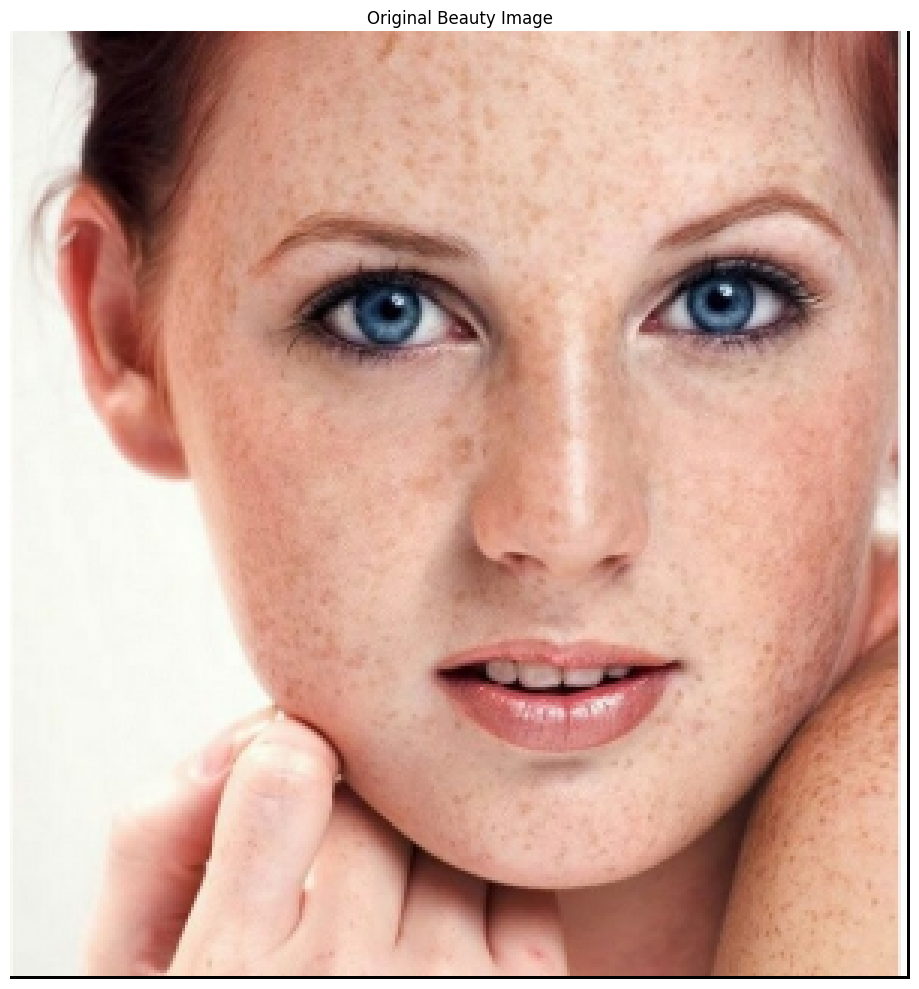

In [4]:
# 读取美女图像
beauty_img = read_image(config.BEAUTY_IMAGE_PATH)
display_images([beauty_img], ['Original Beauty Image'])

## 2. 美化效果实验

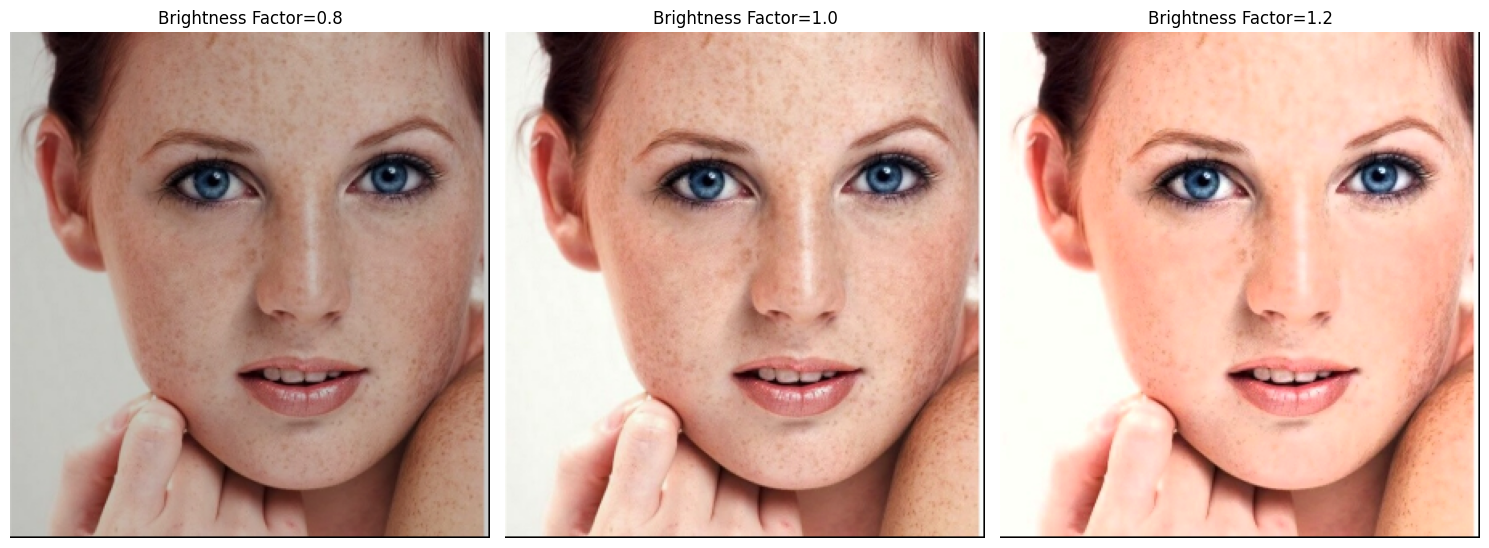

In [5]:
# 实验不同的亮度参数
brightness_factors = [0.8, 1.0, 1.2]
brightness_results = [adjust_brightness(beauty_img, factor) for factor in brightness_factors]
titles = [f'Brightness Factor={factor}' for factor in brightness_factors]
display_images(brightness_results, titles)

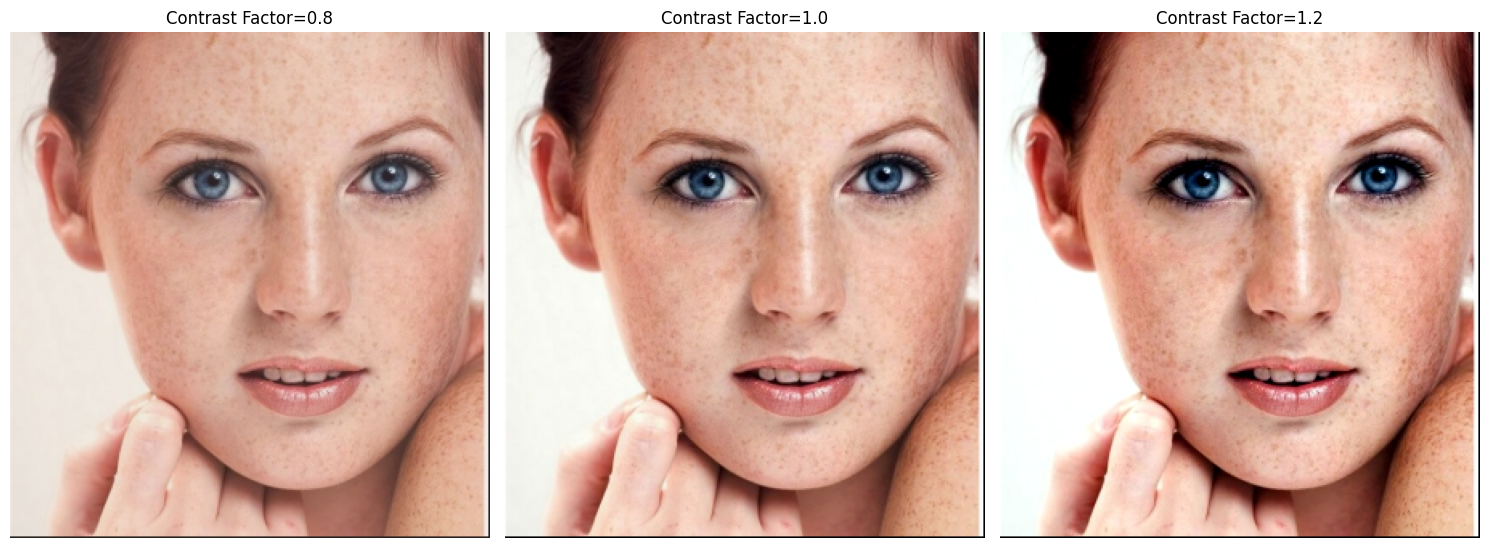

In [6]:
# 实验不同的对比度参数
contrast_factors = [0.8, 1.0, 1.2]
contrast_results = [adjust_contrast(beauty_img, factor) for factor in contrast_factors]
titles = [f'Contrast Factor={factor}' for factor in contrast_factors]
display_images(contrast_results, titles)

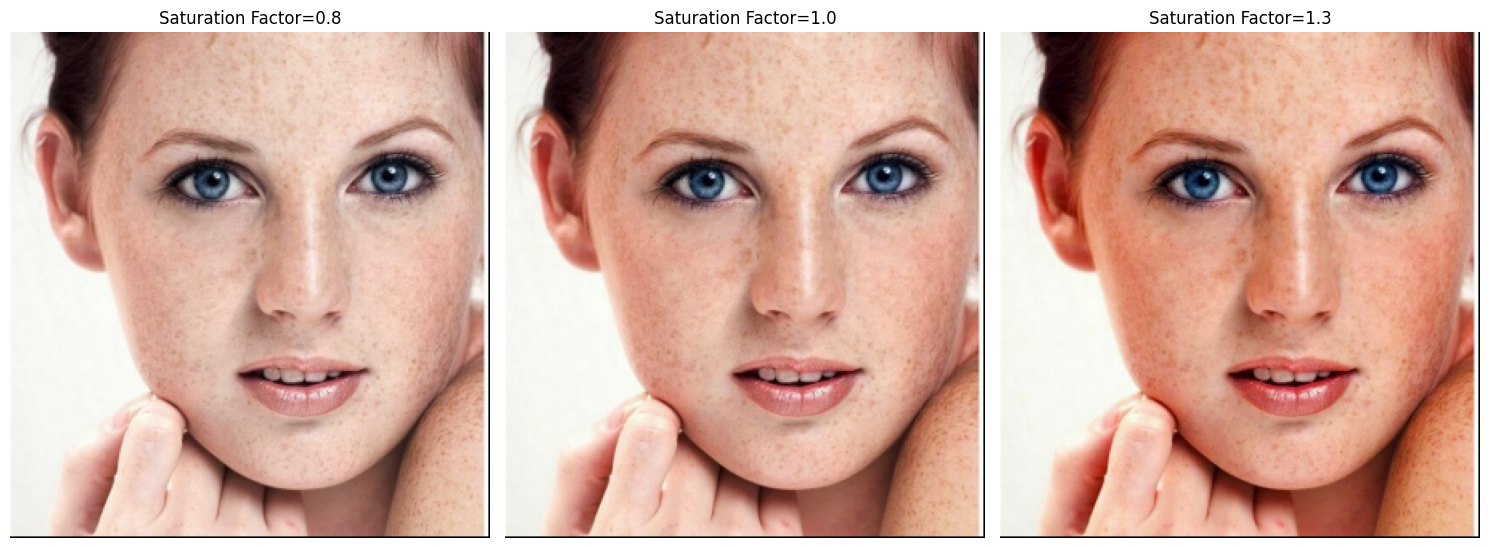

In [7]:
# 实验不同的饱和度参数
saturation_factors = [0.8, 1.0, 1.3]
saturation_results = [adjust_saturation(beauty_img, factor) for factor in saturation_factors]
titles = [f'Saturation Factor={factor}' for factor in saturation_factors]
display_images(saturation_results, titles)

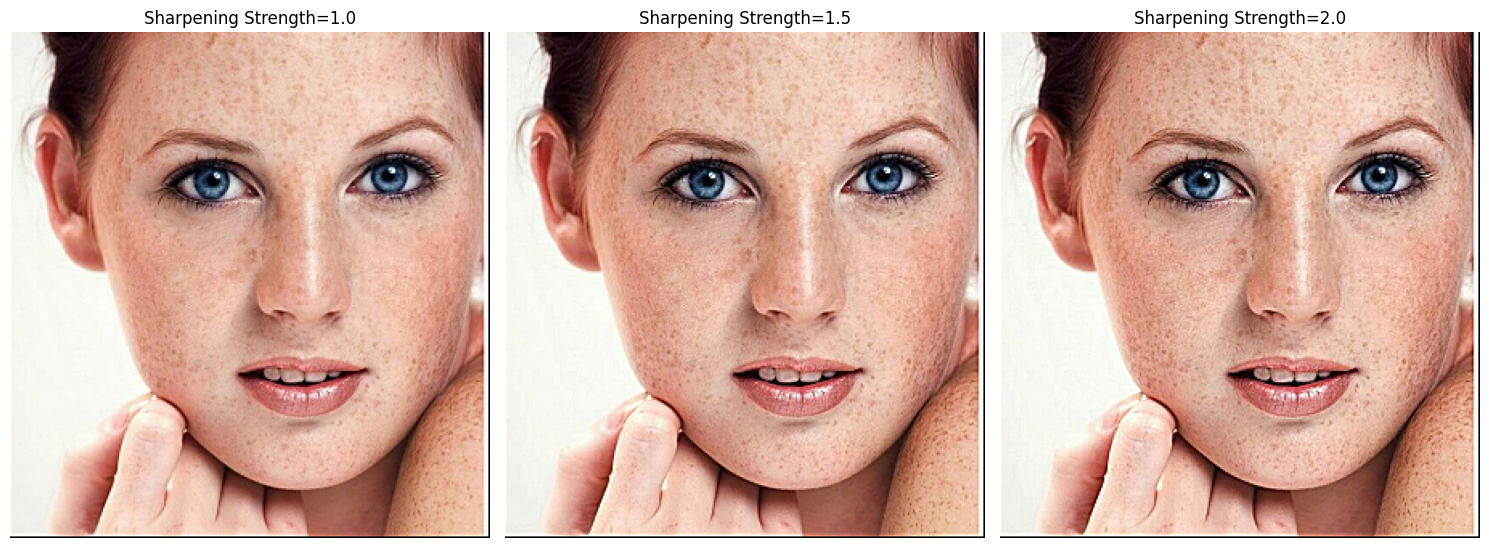

In [8]:
# 实验不同的锐化参数
sharpness_factors = [1.0, 1.5, 2.0]
sharpness_results = [unsharp_mask(beauty_img, kernel_size=5, strength=factor) for factor in sharpness_factors]
titles = [f'Sharpening Strength={factor}' for factor in sharpness_factors]
display_images(sharpness_results, titles)

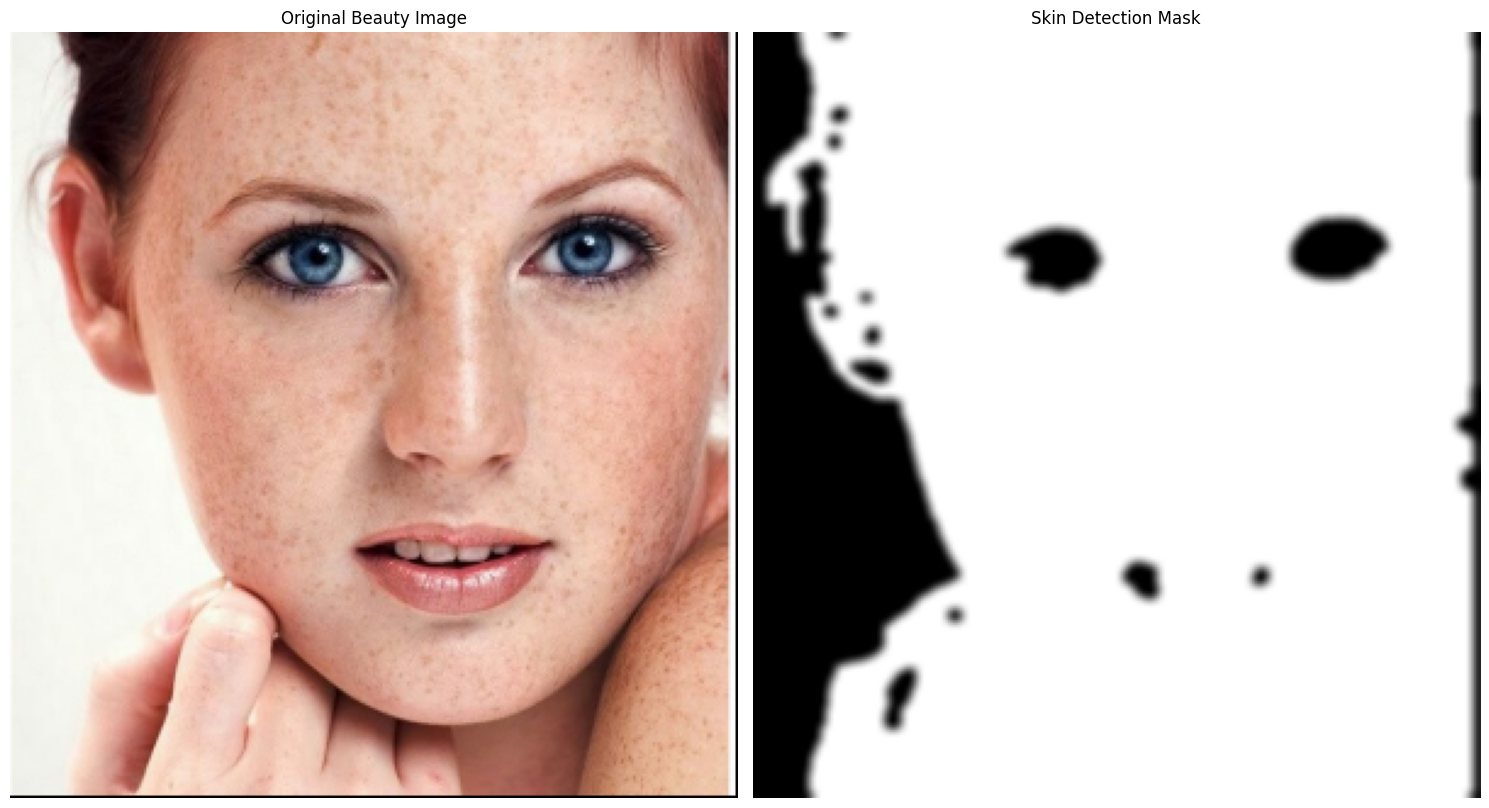

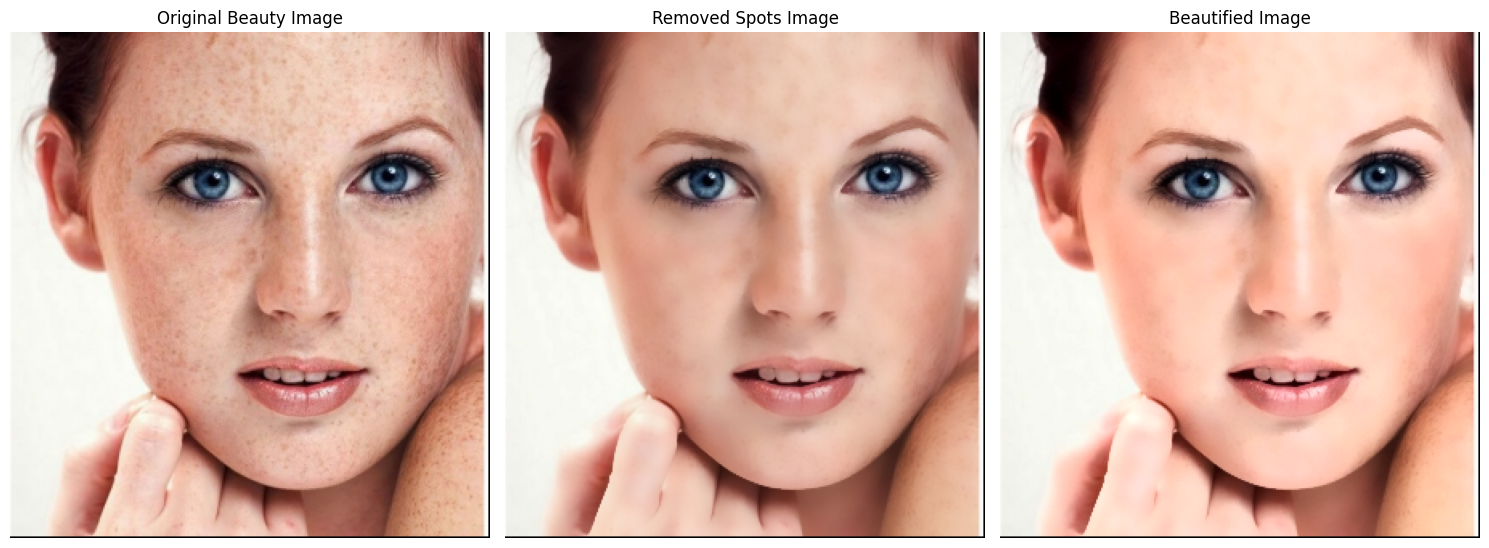

图像已保存至: /home/hac/image/data/output/beauty_enhanced.jpg


In [9]:
from task1_beautification import remove_spots, skin_whitening, beautify_image, skin_detection
    
# 显示皮肤检测结果
skin_mask = skin_detection(beauty_img)
display_images([beauty_img, cv2.cvtColor(skin_mask, cv2.COLOR_GRAY2RGB)], ['Original Beauty Image', 'Skin Detection Mask'])

# # 实验不同的去斑强度
# spot_removal_strengths = [0.5, 0.8, 1.0]
# spot_removal_results = [remove_spots(beauty_img, strength) for strength in spot_removal_strengths]
# titles = [f'Spot Removal Strength={strength}' for strength in spot_removal_strengths]
# display_images(spot_removal_results, titles)

# # 实验不同的美白参数
# whitening_results = [
#     skin_whitening(beauty_img, 1.1, 1.05, 0.95),
#     skin_whitening(beauty_img, 1.15, 1.1, 0.9),
#     skin_whitening(beauty_img, 1.2, 1.15, 0.85)
# ]
# titles = ['Mild Whitening', 'Medium Whitening', 'Strong Whitening']
# display_images(whitening_results, titles)
removed_spots_image = remove_spots(beauty_img, strength=0.8, d=12,
                                    sigma_color=75, sigma_space=75)

# 全流程美化实验
beautified_image = beautify_image(beauty_img, 
                                  remove_spots_strength=0.8,
                                  d=12, 
                                  sigma_color=75, 
                                  sigma_space=75,
                                  brightness_factor=1.15,
                                  contrast_factor=1.1,
                                  saturation_factor=0.95,
)
display_images([beauty_img, removed_spots_image, beautified_image], ['Original Beauty Image', 'Removed Spots Image', 'Beautified Image'])

# 保存美化后的图像
beauty_output = config.BEAUTY_OUTPUT_PATH
save_image(beautified_image, beauty_output)

## 3. 苹果梨子融合实验

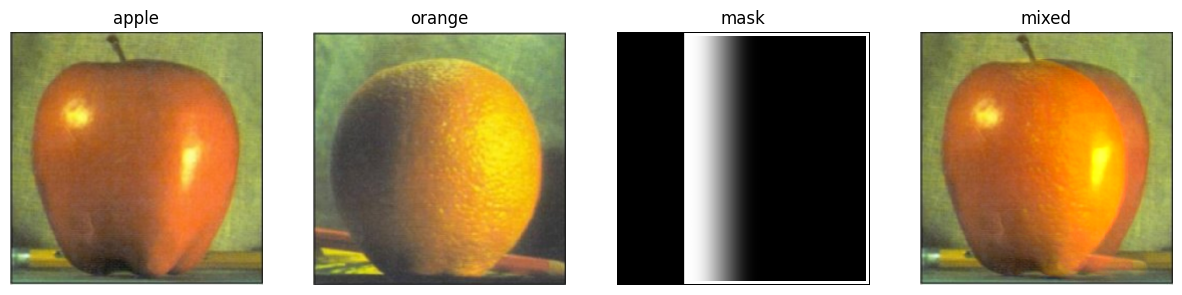

In [10]:
from src.task2_fruit_fusion import blend_apple_orange, half_half_blend
from utils.image_io import read_image
import matplotlib.pyplot as plt
import config

# 读取图片
apple = read_image(config.APPLE_IMAGE_PATH, color_mode='rgb')
orange = read_image(config.ORANGE_IMAGE_PATH, color_mode='rgb')
orange = cv2.resize(orange, (apple.shape[1], apple.shape[0]))

# 融合参数
band_width_ratio = 0.18  # 渐变带宽度（0.15~0.25可调）
center_offset_x = 10    # 中心点微调
mode = cv2.MIXED_CLONE   # 或 cv2.NORMAL_CLONE

# 融合
result, mask = blend_apple_orange(apple, orange, band_width_ratio, center_offset_x, 0, mode)

# 显示
plt.figure(figsize=(15,5))
plt.subplot(1,4,1); plt.imshow(apple); plt.title('apple'); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(orange); plt.title('orange'); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(mask, cmap='gray'); plt.title('mask'); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(result); plt.title('mixed'); plt.axis('off')
plt.show()

图像已保存至: /home/hac/image/data/output/apple_orange_fusion.jpg


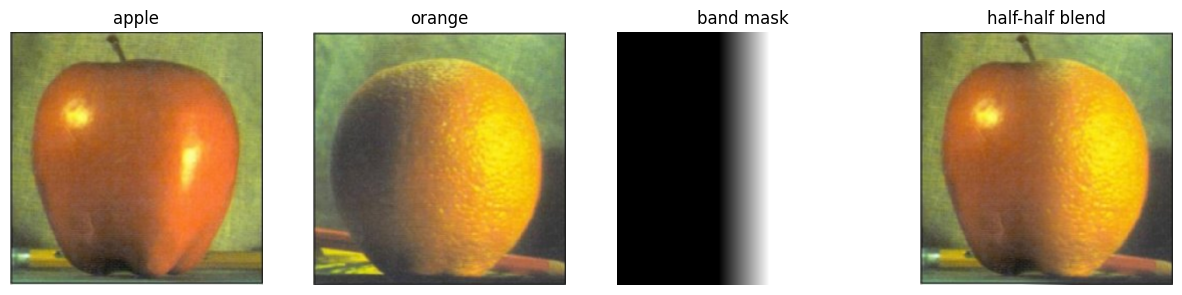

In [ ]:
blended, mask = half_half_blend(apple, orange, band_width_ratio=0.20)

mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)  # 将mask转换为RGB格式以便显示

output_path = config.FUSION_OUTPUT_PATH
save_image(blended, output_path)

plt.figure(figsize=(15,5))
plt.subplot(1,4,1); plt.imshow(apple); plt.title('apple'); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(orange); plt.title('orange'); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(mask); plt.title('band mask'); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(blended); plt.title('half-half blend'); plt.axis('off')
plt.show()